# Introduction

#Problem definition
**NOTE: ** I have written an introduction to the project, a problem definition and a description of the ML process / the tools that can be used in the PRDL report. I wasn't quite sure what should be different here so I will add them in the next version

#Tools and strategy

#Data Preparation
In this section I will explain how I have prepared the the data. This is an important part of the machine learning process since the raw data obtained is often incomplete or formatted in a way that isn't optimal for our purposes. I will delve into the art of data cleaning and explain the choices I have made along the way.

##Importing the data
The first step of the data preparation process is to import the data. I will also import some useful libraries for cleaning and visualizing the data.

In [1]:
# I will mount my google drive to the colab environment, so I will be able to retrive data from the cloud. 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Useful libraries
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
# I define the path to the csv data file
path= "/content/drive/MyDrive/MLLB/RawData/Info_BDApnea_QuironMalaga.csv"
# The csv file is read into a pandas Dataframe. Values in the csv file are seperated by semicolons and every value of -1 should be considered NaN
data = pd.read_csv(path,sep=';',na_values=['-1'], decimal=',')

##Inspect the data

Now that I have imported the data it is time to inspect it. I will begin getting a feel for the size and shape of my data. For this I can use the **info()** function

In [4]:
# Displays info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient         685 non-null    object 
 1   Comentarios     857 non-null    object 
 2   Audios tumbado  683 non-null    object 
 3   Fotos           683 non-null    object 
 4   Audio fs KHz    683 non-null    object 
 5   Gender          683 non-null    object 
 6   EPWORTH         55 non-null     object 
 7   IAH             649 non-null    float64
 8   IAH Supino      360 non-null    object 
 9   IAH Lateral     263 non-null    object 
 10  Peso            677 non-null    object 
 11  Talla           676 non-null    float64
 12  IMC             0 non-null      float64
 13  Edad            675 non-null    float64
 14  PerCervical     671 non-null    float64
 15  Fumador         680 non-null    object 
 16  Roncador        680 non-null    object 
 17  Enfermedades    678 non-null    obj

As we can see, there are 27 columns and 873 rows. The columns correspond to features such as height, gender or age, and each row is associated with a patient. Furthermore I can see that each column has a data type, some columns contains numbers while others contain objects. At this moment it is not clear to me what these values look like and what an information an object can hold. I will use the **head()** function to take a closer look at the first 5 entries.

In [5]:
data.head()

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,...,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
0,P0001,es el Patient0002 (fotos) 3 (sentado) y 4 (tum...,si,si,16,hombre,NaN,71.0,NaN,NaN,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P0002,Es el Patient0006 (sentado) y 7 (tumbado),si,si,16,hombre,NaN,29.6,NaN,NaN,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0003,"Patient 8, 9 y 10",si,si,16,hombre,NaN,56.0,NaN,NaN,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0004,Patient 13 y 14,si_codigos,si,16,hombre,NaN,19.7,NaN,NaN,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P0005,Patient0015 los códigos QMH5,si_codigos,si,16,hombre,NaN,9.0,NaN,NaN,...,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I can now see that the non-numerical values that are represented as objects, correspond to strings. For example the Gender column contains 'hombre' or 'mujer' depending on whether the paitent is a man or a woman. Furthermore I can see that there are some fields containing the value **'NaN'** which is an abbreaviation of 'Not a Number' and signifies that the data is missing. I am actually seeing quite a lot of these missing values, just in the first 5 rows, so a natural next step would be to visualize the missing values.

##Missing values
I will use the library **msno** to plot the missing data.

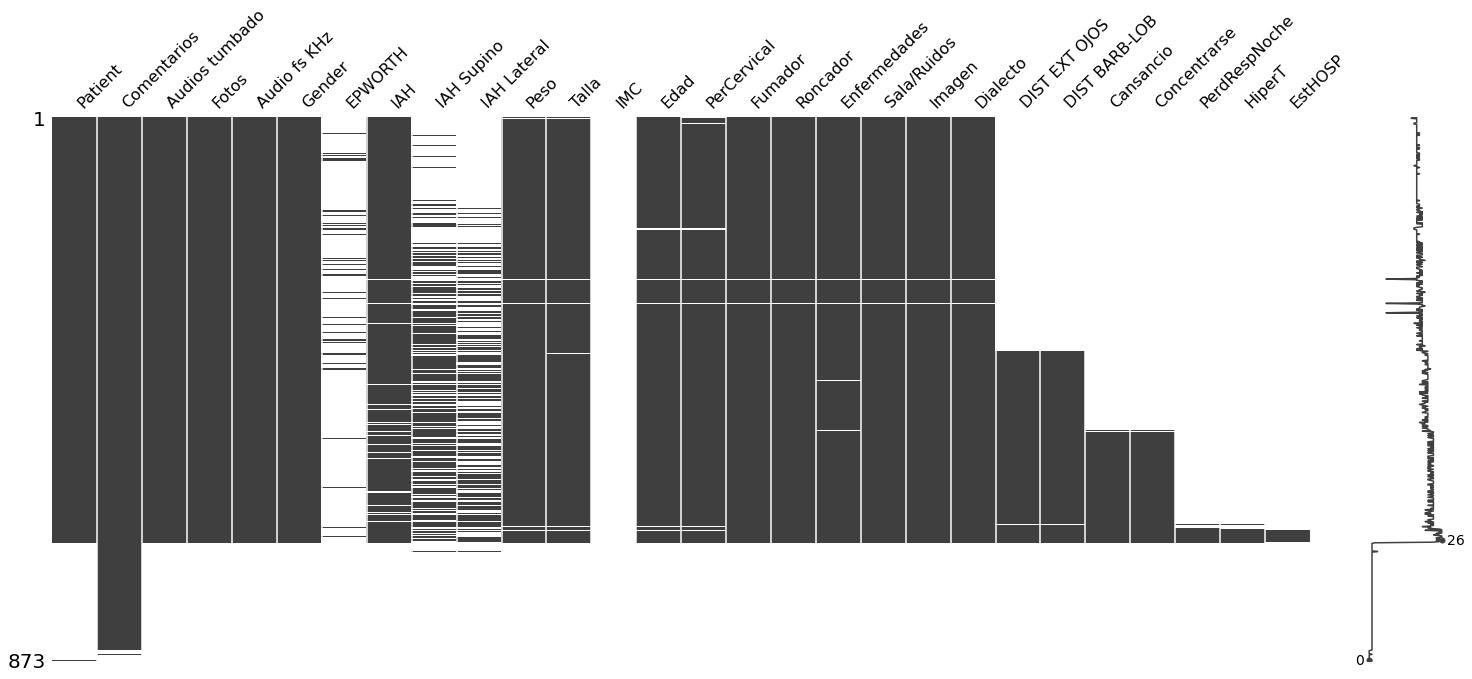

In [6]:
# I use msno.matrix() to visualize the missing values in the dataset
msno.matrix(data);

Interesting! It seems that almost all the rows contain 'NaN' values long before row 873 is reached. If neccesary, it is possible to compensate for the missing data by filling in values, using various methods. For example the mean of the rest of the column values could be used or the most frequent value in that column. However since aproxamitely 20% of the data is missing towards the end, I don't think it is worth it nor valid to fill them in. But what is going on in these rows? Let's take a closer look. I will use the the **loc[]** function to view the data from row 680, right before the sudden absence of data.

In [7]:
data.loc[680:686]

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,...,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
680,P0681,QMH690(patient0755) usa CPAP,NO_UNAREP,si,55/16,hombre,NaN,NaN,NO disponible,NaN,...,434,nd,andaluz/Málaga,9.181,"14,35",no,no,1,1.0,0.0
681,P0682,QMH691(patient0756),NO_UNAREP,si,55/16,mujer,NaN,5.4,NaN,este sobre todo,...,436,nd,andaluz/Málaga,8.543,"11,956",si,si,1,0.0,1.0
682,P0683,QMH692(patient0757) FOTOS BOCA y RESPIRACIONES...,NO_UNAREP,si,55/16,mujer,NaN,31.9,NaN,NaN,...,422,nd,andaluz/Málaga,8.535,"13,517",no,no,1,1.0,NaN
683,P0684,FOTOS y TUMBADO - patient0758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,NaN,patient0759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,NaN,patient0760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
686,NaN,patient0761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Interesting! It seems that the ID of the patient is moved into the 'commentarios' column, but there is not data associated with these patients and the ID alone is uninformative. I will use the **iloc[]** function again to reassign only a subset (row 0 to 684) of the orignal dataframe, to the variable 'data'. 

In [8]:
# Reassign a subset of dataframe to data
data = data.iloc[0:684];

Now let us take a look at the missing values again. This time I will use a barplot.

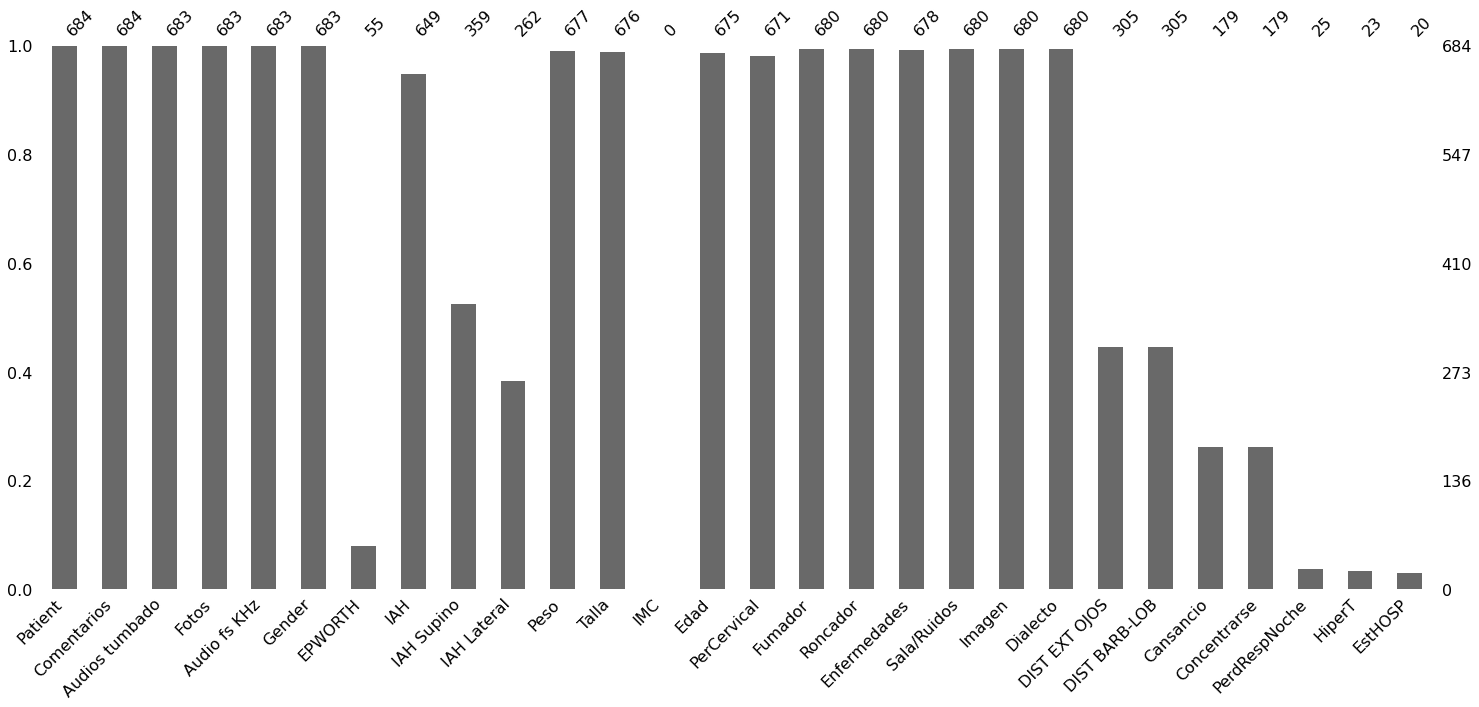

In [9]:
# Bar plot of missing data
msno.bar(data)

It is clear that some of the features are still missing a lot of data. Some columns are missing so much data that they are practically unusable (unless of course, we use the absence of data as a feature, sometimes the reason behind the missing data, might actually have some influence on the target variable). But for now I will set a threshhold for the percentage of non-missing values in each column in the dataset. If a column falls below this threshold it will be deleted.

In [10]:
# I will remove all the features/columns from the dataset that have less than 90% of non-missing values
data = data.dropna(axis='columns', thresh=len(data)*0.9);

In [11]:
# Show the info of the updated dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient         684 non-null    object 
 1   Comentarios     684 non-null    object 
 2   Audios tumbado  683 non-null    object 
 3   Fotos           683 non-null    object 
 4   Audio fs KHz    683 non-null    object 
 5   Gender          683 non-null    object 
 6   IAH             649 non-null    float64
 7   Peso            677 non-null    object 
 8   Talla           676 non-null    float64
 9   Edad            675 non-null    float64
 10  PerCervical     671 non-null    float64
 11  Fumador         680 non-null    object 
 12  Roncador        680 non-null    object 
 13  Enfermedades    678 non-null    object 
 14  Sala/Ruidos     680 non-null    object 
 15  Imagen          680 non-null    object 
 16  Dialecto        680 non-null    object 
dtypes: float64(4), object(13)
memory us

Great! Now I only have 17 columns/features to work with. Sometimes more features equal better models, but since I am manually cleaning the data, it makes it easier to maintain an overview. So far I have discarded features based on missing values, but now might be a good time to think about which features could be good predictors of the target variable 'IAH', given my domain knowledge. I know that Sleep Apnea occurs as a result of the muscles that support the soft tissues in the throat, temporarily relaxing and narrowing the airway. I also know that the risk of Sleep Apnea is higher for people that are overweight, and is more prevalent amongst older men. With these considerations in mind, I can take a look at the features in my dataset again.

##Manual feature selection

Looking at the remaining features I can see that the data for 'Peso' (Weight), 'Edad' (Age), and Gender is available in my dataset. Furthermore the column 'PerCervical' contains data about the width of the patients neck, another variable that could have a reasonable influence on IAH. I will start by extracting these features into a new dataframe, and return to the others if I detect signs that the current features aren't useful for predicting IAH.

In [12]:
# I create a new dataframe with only the selected features
features = ['IAH', 'Peso', 'Talla', 'Edad', 'PerCervical','Gender']
data_reduced = data[features].copy()
data_reduced.head()

,IAH,Peso,Talla,Edad,PerCervical,Gender
0,71.0,82,168.0,39.0,NaN,hombre
1,29.6,119,174.0,56.0,48.0,hombre
2,56.0,NaN,NaN,46.0,43.0,hombre
3,19.7,78,168.0,39.0,42.0,hombre
4,9.0,80,173.0,32.0,40.0,hombre


Let me take a look at the types of the data again

In [13]:
data_reduced.dtypes

IAH            float64
Peso            object
Talla          float64
Edad           float64
PerCervical    float64
Gender          object
dtype: object

Hmm, it is clear that the columns 'Peso', 'IAH' and 'PerCervical' contain numbers, but still they don't show up as numerical data in the dtypes output. I am guessing that the numbers typed in have been saved as text by mistake, so let's convert these strings to numbers.

In [14]:
# We can use pd.to_numeric to convert from object to float64
features_to_convert = ['IAH', 'Peso','PerCervical']
data_reduced[features_to_convert] = data_reduced[features_to_convert].apply(pd.to_numeric, errors='coerce')

The dataframe still contains some missing values, I will use the **msno()** function again to visualize them

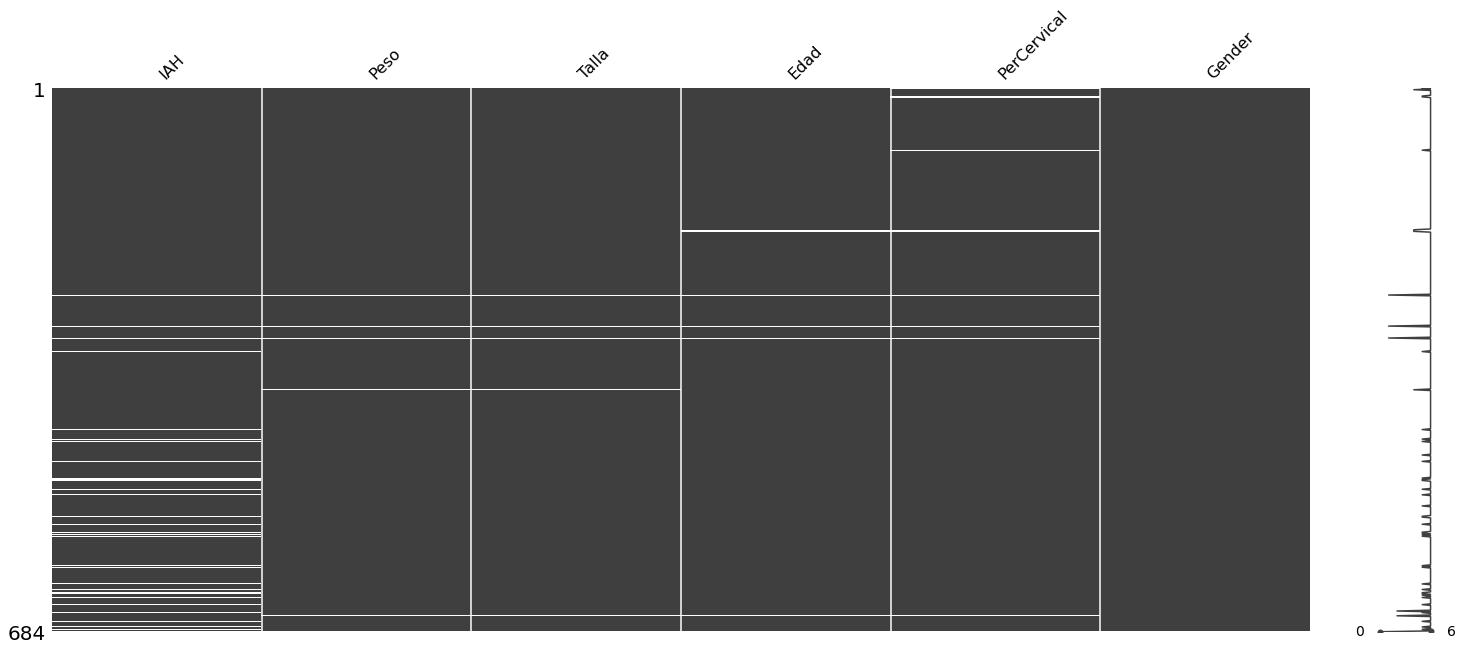

In [15]:
msno.matrix(data_reduced)

Since most of the data is intact it would be possible to impute the missig values. It should be said that this can be dangerous if done incorrectly and can introduce misleading data into the model. One especially needs to be careful with imputing the values of the target variable (in this case 'IAH'), since this can bias the model in a way that is representative of the actual dataset. If target values do need to be imputed however, due to a small dataset or for other reasons, a basic model could be created from the rows containing data on the target variable, which could later be used to predict the missing target values based on the present features. This is not a perfect solution but it is a better guess than imputing with the mean, and it is more representative of the target variables dependence on the rest of the data. In this situation, I have enough data that I can afford removing the rows with missing values, and removing the need for imputation.

In [16]:
# I drop the rows with NaN values and now there are no missing values in our dataset
data_reduced = data_reduced.dropna();

##Categorical data

The Gender column still contains strings in the form of 'hombre' or 'mujer'. You and I understand what that means, but the computer doesn't (at least not this one) and we will have to convert this categorical value into another representation that can be fed into our model. Since there are only 2 unique values in the Gender column, we can simply create a new column called for example 'not male' and add a 0 if false, and a 1 if true. It is best practice always to use the least represented value in the column as the value that should be 1, so let's take a look at the distribution of values in colum 'Gender'

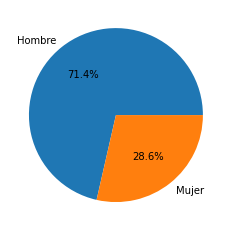

In [17]:
plt.pie(data_reduced['Gender'].value_counts(), labels=['Hombre', 'Mujer'],autopct='%1.1f%%');

Wow! The dataset only contains about 1/4 women. This means that the new binary column should be called 'notMale'. Furthermore this means that our dataset is unbalanced. This can be problematic, especially if being male or female has a strong influence on IAH. For now I will keep the data as is, but if the imbalance has a negative effect on the accuracy of the model, I will go back and find a solution.

In [18]:
# replace all mujer in colum Gender with 1 and all hombre with 0
data_reduced['Gender'] = data_reduced['Gender'].replace('mujer', 1)
data_reduced['Gender'] = data_reduced['Gender'].replace('hombre', 0)
data_reduced = data_reduced.rename(columns={'Gender': 'notMale'})

In [19]:
# I will rename the columns in english for easir readablity
data_reduced.columns = ['IAH', 'Weight', 'Height','Age','CervicalWidth','notMale']

Now all the features are chosen, no data is missing, and all columns contain numerical values. It is time for some exploratory data analysis!

#Exploratory Data Analysis
In this section I will use various libraries to visualize the data, and get a better understanding of the features and their relationships. The section will be divided in two subsections, the first covering EDA for regression and the second, for classification.

##Regression (EDA)

I will start by plotting a scatter_matrix of all the variables. This makes it easy to spot potential correlation between the features all at once. I have omitted the feature 'notMale' since it is hard to spot a correlation solely visually, when there are only 2 possible values. I will return to 'Gender' later in order to examine the correlation. Each square in the following plot shows the two of the features plottet again eachother, while the diagonal shows a histogram of the distribution of values within each feature.

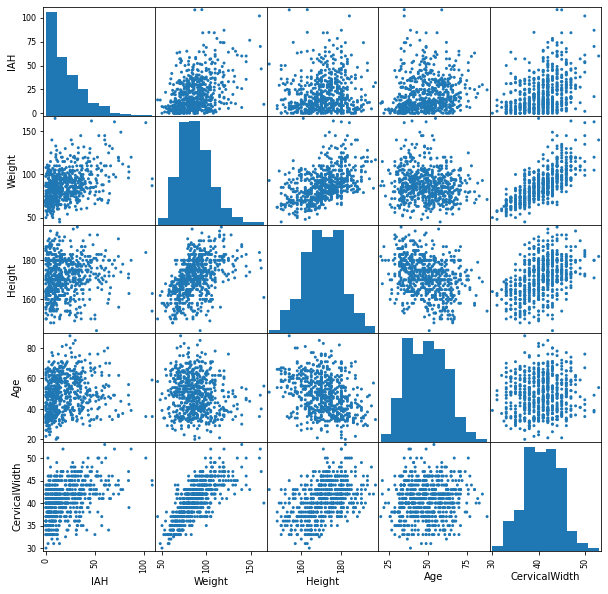

In [20]:
data_reg = data_reduced.copy()
variables_for_scatter = ['IAH', 'Weight', 'Height', 'Age', 'CervicalWidth']
pd.plotting.scatter_matrix(data_reg[variables_for_scatter], alpha=1,figsize = (10, 10));

The data seems to be pretty spread out across the features, but it is possible to spot faint trends among the scatter plots. The feature 'Weight' exhibits a positive linear correlation with 'CervicalWidth' while 'Weight' and 'Height' also show a similar pattern. Right now, I am only making a subjective visual judgement of the data, in order to meassure the actual correlation I will use the function **corr()** to obtain the precise correlations and the function **sns.heatmap** to visualize them.

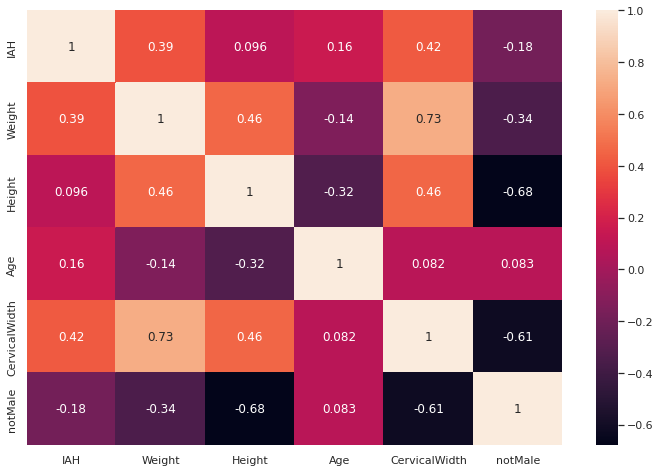

In [21]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(data_reg.corr(),annot=True)


The correlation matrix above shows the R value for each combination of features. R values range from -1, a strong negative linear correlation, to 1, a strong positive linear correlation. If the R value is 0 the features don't correlate. A correlation between two features could still exist if the R value is 0, but then it is not a linear correlation.

###Assumptions of linear regression

As with all statistical models, garbage in equals garbage out, and there are a few assumptions that need to hold true when applying linear regression. One of these assumptions is the the assumption of no multicollinearity, meaning that the indipendent variables (our features) are not correlated with eachother (at least not strongly). Multicollinearity doesn't always negatively effect the predictions of our models, but it makes it harder to explain which features are the root cause of the prediction. In order to remove features that are highly correlated I will use **vif()** to calculate the Variance Inflation Factor. A VIF score of 1 means that a feature is not correlated with the rest of the features, less than 5 signifies a moderate correlation, while more than 5 equals a high correlation. I will write a function to compute the VIF score

#### Variance Inflation Factor

In [22]:
features = ['Weight','Height','Age','CervicalWidth','notMale']
target = 'IAH'

In [23]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(dataset,considered_features):
    
    X = dataset[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [24]:
# compute vif 
compute_vif(data_reg,features).sort_values('VIF', ascending=False)

,Variable,VIF
3,CervicalWidth,3.628860
4,notMale,2.801349
0,Weight,2.741287
1,Height,2.414393
2,Age,1.268926


I can see that 'CervicalWidth' is the variable that is most correlated with the rest of the variables. I could remove it, but since I can guess that 'CervicalWidth' is correlated with Weight, and the correlation from the corr() matrix was higher between 'CervicalWidth' and 'IAH' I will remove 'Weight' instead. Calculating the VIF score is an iterative process, so after removing weight I will run it again. Before continuing I will set a threshold for when to stop the iteration. Features don't need to be completely independent so I will set a VIF score threshold of 2.5 and only stop removing features when all remaining features have a VIF score below this value.

In [25]:
# compute vif 
features.remove('Weight')
data_reg = data_reduced.drop('Weight',axis=1)
compute_vif(data_reg,features).sort_values('VIF', ascending=False)

,Variable,VIF
3,notMale,2.393577
0,Height,2.178126
2,CervicalWidth,1.686342
1,Age,1.209181


Now all values are below the threshold of 2.5 and I can see that CervicalWidth has moved further down the sorted list, since a lot of its VIF score was a result of the presence of 'Weight'.

####SelectKBest

Now that none of the features are unacceptably correlated with eachother, I will move on to determining which features have the biggest influence on IAH. For this I will use the **SelectKBest** function from sklearn. The higher the K score, the stronger the relationship.

In [26]:
from sklearn.feature_selection import SelectKBest, f_regression
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(data_reg[features], data_reg[target])
# transform train input data
X_train_fs = fs.transform(data_reg[features])
# transform test input data

names = list(data_reg[features].columns.values)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (names[i], fs.scores_[i]))

Feature Height: 5.898923
Feature Age: 15.952785
Feature CervicalWidth: 137.282776
Feature notMale: 21.655017


I can see that 'CervicalWidth' has the highest score, and therefore has the highest correlation with our target variable 'IAH'. The feature 'Height' seems to have a very small effect on 'IAH' so I will remove it.

In [27]:
data_reg = data_reg.drop('Height',axis=1)

### Distribution and transformation

Now I have only 3 features and 1 target variable. One last thing I might do is take a look at the scatter matrix again. Another assumption when using linear regression is that the input data is normally distributed. For 'Age' and 'CervicalWidth' this seems to hold, but the data in 'IAH' is extremely right skewed.

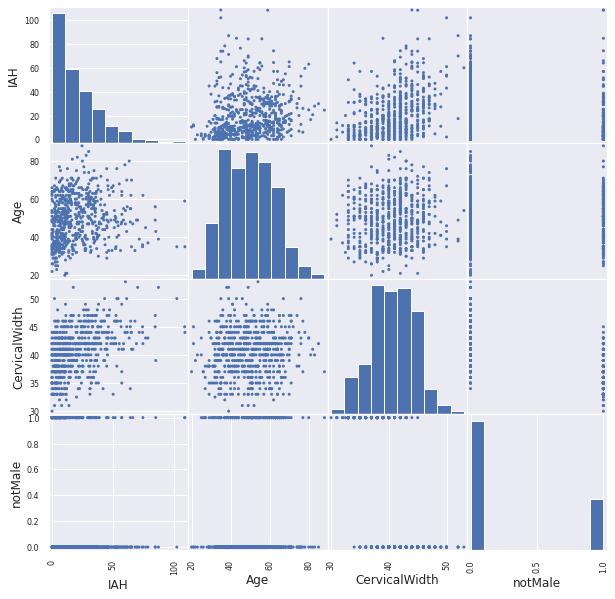

In [28]:
pd.plotting.scatter_matrix(data_reg, alpha=1,figsize = (10, 10));

Sometimes when data is not be normally distributed, it is possible to do a transformation on the data, in order to make it more convenient to work with. I will take a closer look at the distribution of 'IAH' with a **QQ-plot**

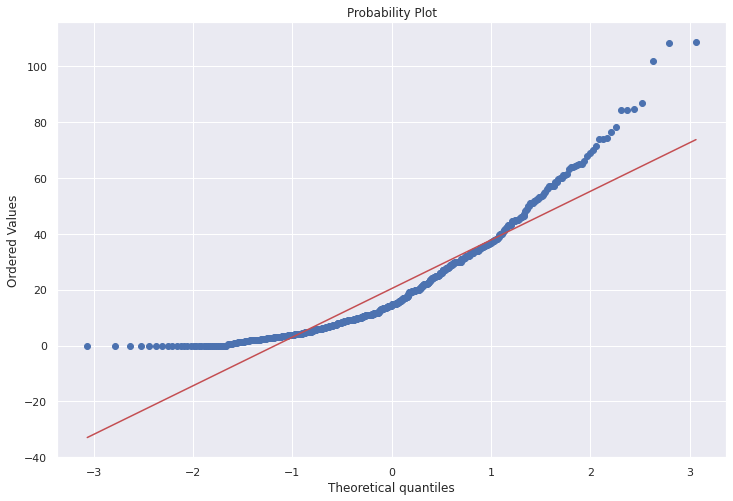

In [29]:
import scipy.stats as stats
stats.probplot(data_reg['IAH'], dist="norm", plot=plt)
plt.show()

The data definitely doesn't follow the line, and exhibits a clear curved pattern. I will use a log transform in order to transform the data into a form where it is more normally distributed. This will likely help our linear regression model make better predictions.

In [30]:
data_reg['IAH_LOG'] = np.log1p(data_reg['IAH'])

I will plot the correlation matrix one final time

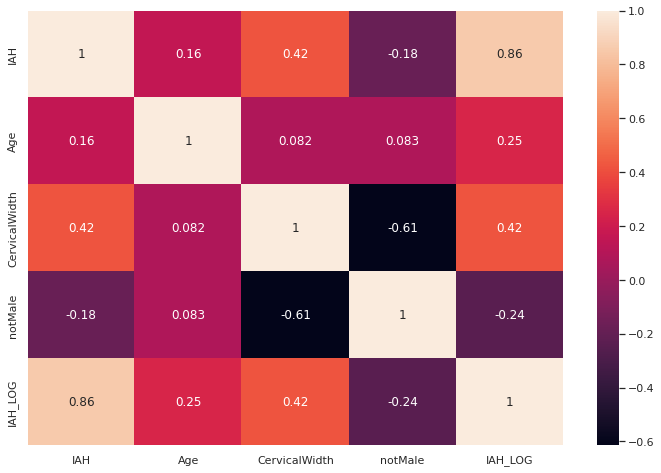

In [31]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(data_reg.corr(),annot=True)

As we can see in the corr() plot, the our 3 features, correlate better with the new IAH_LOG feature. We can therefore train our model on predicting the log of the IAH and then reverse the transformation to recover the actual 'IAH' values. 

### Train and test sets

Finally I will save the features in a variable 'X' and the target (the log of IAH) in a variable 'y' and split the data into training and test sets.

In [32]:
target = 'IAH'
fts = ['CervicalWidth','Age']

X = data_reg.copy()
X = data_reg[fts]
y = data_reg[target]
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg =  train_test_split(X,y,test_size = 0.2, random_state= 0)

The test set is created in order to evaluate the accuracy of the model. If the model was evaluated on the same data that it was trained on, it might result in an optimisticly high accuracy, that wouldn't occur on other unseen data. Now that we chosen our features and our target variable we are ready to select our model.

##Classification (EDA)

For the classification EDA I will make use of some similar concepts as in regression, but with a different approach, especially in terms of data visualization and feature engineering. I will start by creating the categorical feature for 'IAH', where every value over above 30 will be considered 'severe' and every value under 10 will be considered 'healty'

In [33]:
classf_data = data.copy()

classf_data = classf_data.dropna()

classf_data['IAH'] = pd.cut(classf_data['IAH'],bins=[0,10,30,np.inf],labels=['Healthy','Mild','Severe'])


In [34]:
# Drop na again because the pd.cut function introduces some NaN again
classf_data = classf_data.dropna()

In [35]:
classf_data = classf_data[classf_data.IAH != 'Mild']

As in the previous EDA I will convert the features 'Peso' and 'PerCervical' to numerical data

In [36]:
# We can use pd.to_numeric to convert from object to float64
features_to_convert = ['Peso','PerCervical']
classf_data[features_to_convert] = classf_data[features_to_convert].apply(pd.to_numeric, errors='coerce')

###Histograms and distribution

In order to see if there are any clear seperation between the distribution of values features for each cetegory of 'IAH' I will use the following function to plot a histogram. The histogram will be difficult to plot for categorical data with many unique values, so I will use the **nunique()** function to find features with fewer unique values. Although I will include the numerical features, since they are easier to intepret regardless of unique valu amount.

In [37]:
classf_data.nunique()

Patient           365
Comentarios       365
Audios tumbado      3
Fotos               2
Audio fs KHz        2
Gender              2
IAH                 2
Peso               81
Talla              47
Edad               54
PerCervical        22
Fumador             5
Roncador            7
Enfermedades      134
Sala/Ruidos        31
Imagen             10
Dialecto          117
dtype: int64

Let's see. Some categorical features have hundreds of unique values (probably due to a custom text field in the data entry interface) while others have less than 10. Let me set the threshold at less than 10 and include all features that uphold this in the histogram plot.

In [38]:
categorical = list(classf_data.columns[classf_data.nunique() < 10])

In [39]:
numeric = list(classf_data.columns[classf_data.dtypes == float])

In [40]:
features_hist = categorical + numeric

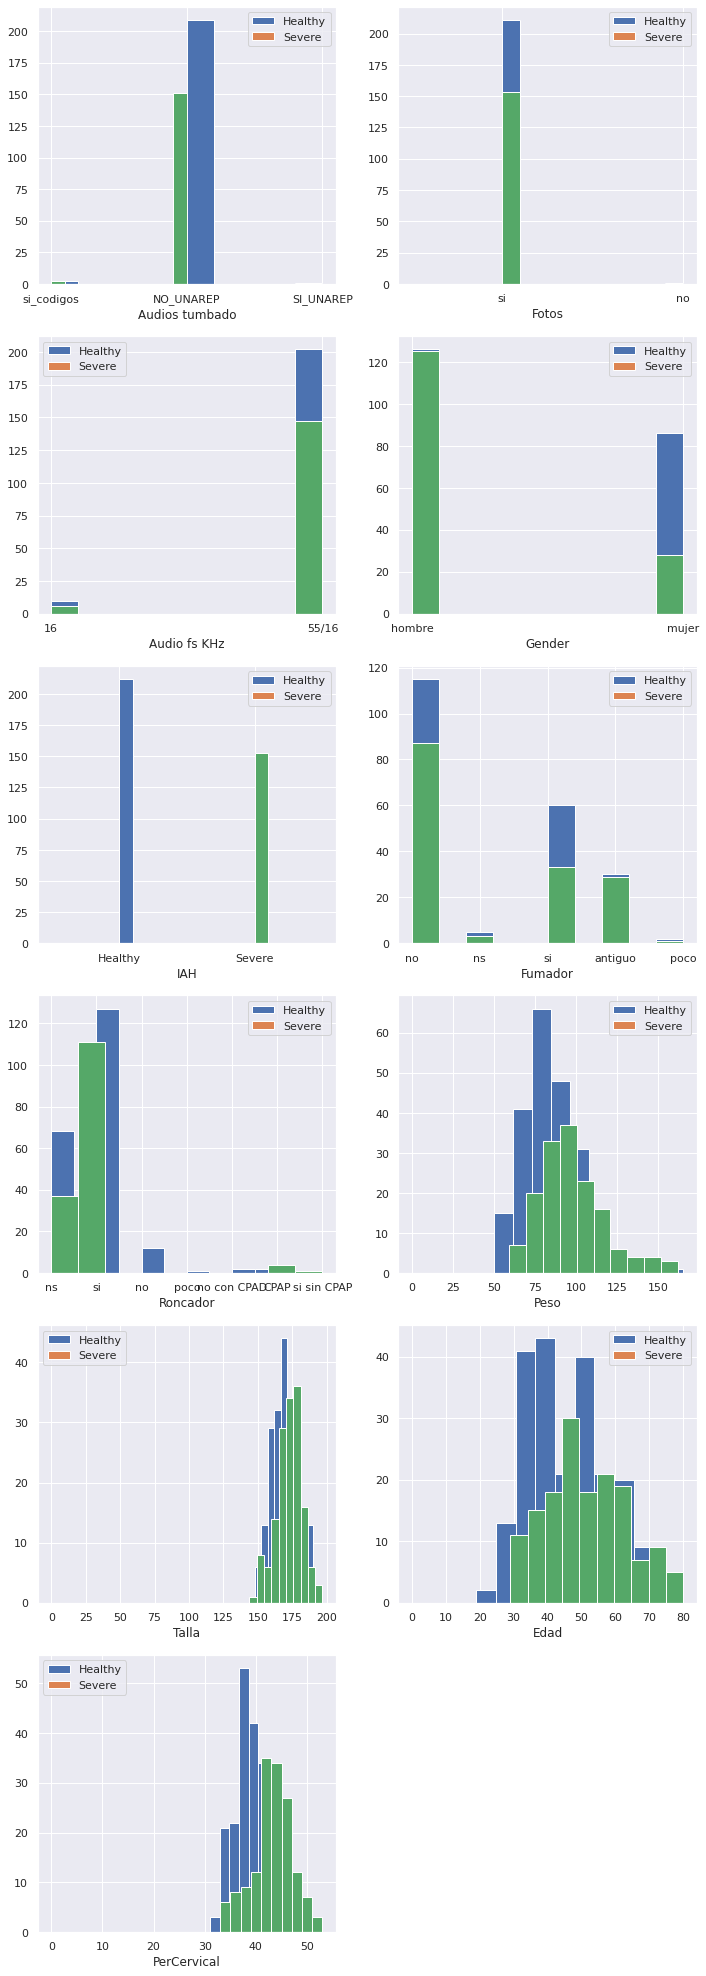

In [41]:
fig = plt.figure(figsize=(10,50))

c = 1;

for i in range(len(features_hist)):
    plt.subplot(len(features_hist), 2, c)
    classf_data.groupby('IAH')[features_hist[i]].hist(alpha=1)
    plt.xlabel(features_hist[i])
    c = c + 1
    plt.legend(['Healthy','Severe'])

plt.tight_layout()
plt.show()

Let's take a look! First of all there seems are more absolute 'Severe' and 'Healthy' cases amongst men. This makes sense since the data is about 75% male, as we saw earlier. However the frequency of the 'Healthy' and 'Severe' cases vary between the genders, with the female category having many more healthy cases than severe. This corresponds well with our domain knowledge that men are at higher risk of sleep apnea than women.

IAH
Healthy    AxesSubplot(0.125,0.125;0.775x0.755)
Mild       AxesSubplot(0.125,0.125;0.775x0.755)
Severe     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Gender, dtype: object

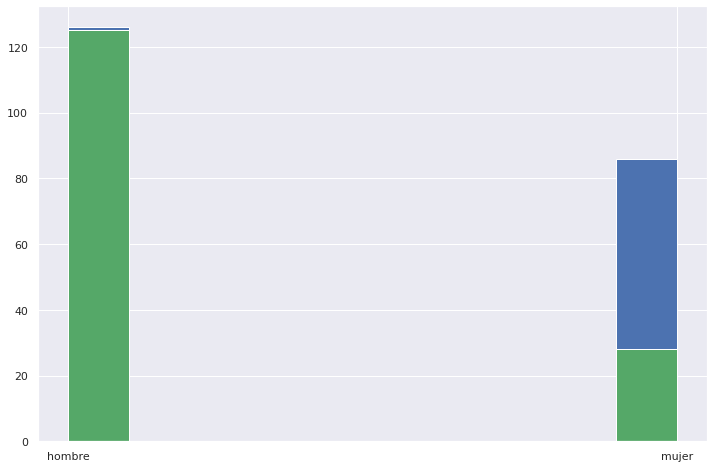

In [42]:
classf_data.groupby('IAH')['Gender'].hist()

###Statistical tests

Again this is only a subjective visual inference, in order to test the difference I will use statistical test. Two useful tests in this scenario would be the **two sample t-test** and the **Mann-Whitney U test**.
The first is a parametric test that assumes that the samples are normally distributed, while the latter doesn't assume anything about the data. If our data is categorical, we can use a **chi squared** test the relationship between two categorical variables. I will use the chi squared test to calculate if there is a statistical significant relationship between Gender and IAH category (with a significance level of 0.05). The nullhypothesis being that there is no difference between the proportions of IAH across gender.

In [43]:
# A function that creates a more convient output for the chi2 results
def chi2_table(series1, series2, to_csv = False, csv_name = None, 
                prop= False):
    
    if type(series1) != list:
        crosstab = pd.crosstab(series1, series2)
        crosstab2 = pd.crosstab(series1, series2, margins= True)
        crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
        crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        
        if prop == False:
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.20f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                                             
                file = open(csv_name, 'a')
                file.write(f"{crosstab2.columns.name}\n")
                file.close()
                crosstab2.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()              
                
        if prop == 'Row':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                
                file = open(csv_name, 'a')
                file.write(f"{crosstab_proprow.columns.name}\n")
                file.close()
                crosstab_proprow.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

        if prop == 'Col':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")

            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                    
                file = open(csv_name, 'a')
                file.write(f"{crosstab_propcol.columns.name}\n")
                file.close()
                crosstab_propcol.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

    elif type(series1) == list and type(series2) == list:
        for entry2 in series2:
            for entry1 in series1:
                crosstab = pd.crosstab(entry1, entry2)
                crosstab2 = pd.crosstab(entry1, entry2, margins= True)
                crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
                crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
                chi2, p, dof, expected = stats.chi2_contingency(crosstab)
                
                if prop == False:
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab2.columns.name}\n")
                        file.close()
                        crosstab2.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()                        

                if prop == 'Row':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_proprow.columns.name}\n")
                        file.close()
                        crosstab_proprow.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()
                    
                if prop == 'Col':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_propcol.columns.name}\n")
                        file.close()
                        crosstab_propcol.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()


    elif type(series1) == list:
        for entry in series1:
            crosstab = pd.crosstab(entry, series2)
            crosstab2 = pd.crosstab(entry, series2, margins= True)
            crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
            crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
            chi2, p, dof, expected = stats.chi2_contingency(crosstab)
            
            if prop == False:
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab2.columns.name}\n")
                    file.close()
                    crosstab2.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Row':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_proprow.columns.name}\n")
                    file.close()
                    crosstab_proprow.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Col':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_propcol.columns.name}\n")
                    file.close()
                    crosstab_propcol.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

In [44]:
chi2_table(classf_data['IAH'],classf_data['Gender'])


 Chi-Square test between IAH and Gender 
 
 Gender   hombre  mujer  All
IAH                        
Healthy     126     86  212
Severe      125     28  153
All         251    114  365 
 
 Pearson Chi2(1)= 19.4882 p-value= 0.00001012256795331917


As we can see above, the p value is much smaller than 0.05 and therefore the null hypothesis is rejected. Since there is a relationship between gender and IAH category, 'Gender' might be a useful feature to include in our model.

For the numerical data such as 'Age' I can use the t-test. I will first divide my data into 2 groups. 'Healthy' with and 'Severe', with the corresponding ages

In [45]:
healthy = classf_data.where(classf_data.IAH== 'Healthy').dropna()['Edad']
severe = classf_data.where(classf_data.IAH== 'Severe').dropna()['Edad']

Now I can use the **stats.tttest_ind** from scipy. This test's nullhypothesis is that the mean of the two samples is the same.

In [46]:
from scipy import stats
stats.ttest_ind(healthy,severe)

Ttest_indResult(statistic=-4.700702809793478, pvalue=3.690950616528268e-06)

The p value is much smaller than 0.05 and therefore the null hypothesis is rejected. The t-statistic is negative which means that the mean age of the 'healthy' group is lower than that of the 'severe' group. I will now do the same for the 'Talla' (height) variable.

In [47]:
healthy = classf_data.where(classf_data.IAH== 'Healthy').dropna()['Talla']
severe = classf_data.where(classf_data.IAH== 'Severe').dropna()['Talla']

In [48]:
from scipy import stats
stats.ttest_ind(healthy,severe)

Ttest_indResult(statistic=-2.5329564025502465, pvalue=0.011732106972166834)

The p-value is also below 0.05 in this case, but remembering back to the corr plot() in the Regression EDA, I remeber that Height was highly correlated with Gender, and therefore adding height as a feature would be reduntant. Looking at the histograms from earlier,'PerCervical' also looks to have a different distrubution depending on 'IAH' category. Let's use a t-test again

In [49]:
healthy = classf_data.where(classf_data.IAH== 'Healthy').dropna()['PerCervical']
severe = classf_data.where(classf_data.IAH== 'Severe').dropna()['PerCervical']

In [50]:
stats.ttest_ind(healthy,severe)

Ttest_indResult(statistic=-9.119705470557847, pvalue=5.30587733382163e-18)

This yields an incredibly low p-value and a higher t-statistic than we have seen with the other categories. This is a good sign that 'PerCervical' is a useful feature.

###Categorical reduction

Finally I will look at some of the categorical features with more than 2 unique values. I can use the function **pd.crosstab()** to display a contigency table of the frequency of each category in 'IAH' across the categories in 'Roncador' (meaning whether the patient snores)

In [51]:
pd.crosstab(classf_data['IAH'], classf_data['Roncador'])

Roncador,CPAP,no,no con CPAD,ns,poco,si,si sin CPAP
IAH,,,,,,,
Healthy,2,12,2,68,1,127,0
Severe,4,0,0,37,0,111,1


As we can see there are many different options. Some of them are much less frequent and others can be combined. In other to simplify the data I will carry out a type of feature engineering, and reduce the data to only 'si' and 'no'.

In [52]:

classf_data['Roncador'] = classf_data['Roncador'].replace('CPAP', 'no')
classf_data['Roncador'] = classf_data['Roncador'].replace('no con CPAD', 'no')
classf_data['Roncador'] = classf_data['Roncador'].replace('ns', 'no')
classf_data['Roncador'] = classf_data['Roncador'].replace('poco', 'no')
classf_data['Roncador'] = classf_data['Roncador'].replace('ns', 'no')
classf_data['Roncador'] = classf_data['Roncador'].replace('si sin CPAP', 'si')


Now I can use the **chi2_table** functon again and view the results for the simplified data. Another advantage of simplifying the categories to yes and no is that I will which variables my chi2 results belong to. If there were more categories, I would need to do some post hoc individual test, 2 categories at a time.

In [53]:
chi2_table(classf_data['IAH'],classf_data['Roncador'])


 Chi-Square test between IAH and Roncador 
 
 Roncador   no   si  All
IAH                    
Healthy    85  127  212
Severe     41  112  153
All       126  239  365 
 
 Pearson Chi2(1)= 6.3753 p-value= 0.01157178003887399109


Below I have plotted the new simplified 'Roncador' category, and it is clear that the proportions of 'Healthy' and 'Severe' vary across 'Roncador' category

IAH
Healthy    AxesSubplot(0.125,0.125;0.775x0.755)
Mild       AxesSubplot(0.125,0.125;0.775x0.755)
Severe     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Roncador, dtype: object

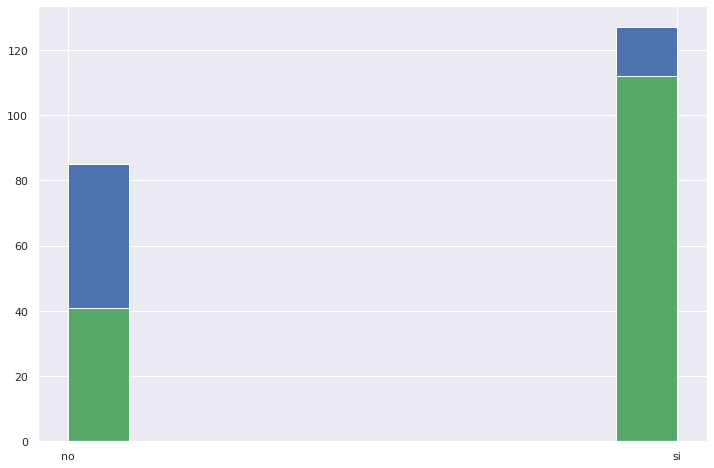

In [54]:
classf_data.groupby('IAH')['Roncador'].hist()

I will simplify the 'Fumador' category as well and use a chi2 to see if there are any interesting differences in distribution.

In [55]:
classf_data.Fumador.unique()

array(['no', 'ns', 'si', 'antiguo', 'poco'], dtype=object)

In [56]:
classf_data['Fumador'] = classf_data['Fumador'].replace('ns', 'no')
classf_data['Fumador'] = classf_data['Fumador'].replace('poco', 'no')


In [57]:
chi2_table(classf_data['IAH'],classf_data['Fumador'])


 Chi-Square test between IAH and Fumador 
 
 Fumador  antiguo   no  si  All
IAH                           
Healthy       30  122  60  212
Severe        29   91  33  153
All           59  213  93  365 
 
 Pearson Chi2(2)= 2.9063 p-value= 0.23382684641849715845


Since the p-value is above 0.05, the difference between the proportions is not statistically significant. This means that the differences seen, could be by chance or random noise in the data. Therefore I will not use 'Fumador' as a feature.

###Train and test sets

I know have my features (Age,CervicalWidth, Gender and Snoring).
Finally I will save the features in a variable 'X' and the target 'IAH' category in a variable 'y' and split the data into training and test sets.

In [58]:
target = 'IAH'
fts = ['CervicalWidth','Age']

X = data_reg.copy()
X = data_reg[fts]
y = data_reg[target]
from sklearn.model_selection import train_test_split
X_train_cls, X_test_cls, y_train_cls, y_test_cls =  train_test_split(X,y,test_size = 0.2, random_state= 0)

The test set is created in order to evaluate the accuracy of the model. If the model was evaluated on the same data that it was trained on, it might result in an optimisticly high accuracy, that wouldn't occur on other unseen data. Now that we chosen our features and our target variable we are ready to select our model.

#Thoughts, Ideas, Questions
I have written some final thoughts and questions for you here, maybe we can have talk about them someday in person

**Thoughts**
This first attempt at EDA has been an interesting experience, at first I was very dishartened by the fact that I all the data was so spread, and that it was hard to find good correlations, but I have seen that the template report also gets a pretty low accuracy on prediction. However I am interested in exploring more, and maybe some more advanced techniques can be used to create better features etc.

**Ideas**
Some of the ideas I had that I didn't have time to implement in this version were:

- Creating an extra categorical feature for 'Very overweight' where its value would be 0 or 1 depending on a threshold. The idea came from wanting to remove outliers, but also realizing that the data is so spread that it is difficult to justify the removal. I thought that if I instead used the outliers as a new binary feature, it could add an extra term to the model, that would boost the IAH even higher if it was present. Although I still wouldn't be able to remove the outliers from the data right? (Which might make the correlation between weight and IAH stronger).

- I was surprised that smoking didn't show any significant correlation, since I read that it was a risk factor

- Finally, maybe the reason why it is hard to predict IAH or IAH category, based on these features is because the patients are already a subset of the population. Since they are already concerned about having OSA and maybe have been referred, that in itself raises their probability of having OSA and therefore the features matter less?


**Questions**
- I have really spent a long time trying to understand the data, is there possibly a README file, with the meaning of all the variables? 

- As you can see below (there are no values, but you can read the code), I tried training some linear models in order to predict the IAH and calculate the MAE. I also tried predicting the IAH_LOG, and even though I get a lower MAE when I reverse the log transform, for some reason the variance becomes much lower between the predictions and y_test. It might just be an error in the code, so maybe it's better to look at in person.

#Model Selection

In [ ]:
# Import the linear models.
from sklearn import linear_model

# Initialize the model class.

model= linear_model.LinearRegression()

#model= linear_model.Ridge(alpha = 0.5)
# Fit the model to the training data.
Trained_model=model.fit(X_train, y_train)

##Scoring for IAH as target variable

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate our predictions for the test set.
predictions = model.predict(X_test)
# Compute error between our test predictions and the actual values.
MSE=mean_squared_error(predictions, y_test)

MAE=mean_absolute_error(predictions, y_test)

print('Mean squared Error: ', MSE, ' Mean Absolute Error: ', MAE)

##Scoring for IAH_LOG as target variable

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate our predictions for the test set.
predictions = np.expm1(model.predict(X_test))
# Compute error between our test predictions and the actual values.
MSE=mean_squared_error(predictions, np.expm1(y_test))

MAE=mean_absolute_error(predictions, np.expm1(y_test))

print('Mean squared Error: ', MSE, ' Mean Absolute Error: ', MAE)

In [ ]:
# Explained variance score: 
from sklearn.metrics import r2_score
logtest = np.expm1(y_test)
print('Variance score: %.2f' % r2_score(y_test, predictions))

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(np.expm1(y_test), predictions,  color='red')

plt.show()

In [ ]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Train and score baseline model
baseline = RandomForestRegressor(criterion="mae", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

